In [1]:
    import tensorflow as tf
    import matplotlib.pyplot as plt
    import pandas as pd
    import seaborn as sns

In [2]:
## Data Preprocessing
## Training Image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 30909 files belonging to 6 classes.


In [3]:
## Validation Preprocessing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 3923 files belonging to 6 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[1.56750000e+02 1.15750000e+02 1.03750000e+02]
   [1.60000000e+02 1.16500000e+02 1.02000000e+02]
   [1.64250000e+02 1.22250000e+02 1.04750000e+02]
   ...
   [1.72250000e+02 1.27750000e+02 1.20250000e+02]
   [1.70000000e+02 1.24500000e+02 1.15000000e+02]
   [1.62500000e+02 1.16250000e+02 1.11000000e+02]]

  [[1.60500000e+02 1.18500000e+02 1.06500000e+02]
   [1.63250000e+02 1.20750000e+02 1.07000000e+02]
   [1.68250000e+02 1.26750000e+02 1.09000000e+02]
   ...
   [1.72000000e+02 1.28000000e+02 1.22000000e+02]
   [1.69250000e+02 1.25250000e+02 1.16250000e+02]
   [1.66750000e+02 1.22250000e+02 1.16500000e+02]]

  [[1.62750000e+02 1.20750000e+02 1.08750000e+02]
   [1.66750000e+02 1.24750000e+02 1.11750000e+02]
   [1.66750000e+02 1.27000000e+02 1.09000000e+02]
   ...
   [1.74500000e+02 1.31000000e+02 1.24750000e+02]
   [1.71000000e+02 1.27500000e+02 1.20750000e+02]
   [1.72000000e+02 1.29000000e+02 1.22750000e+02]]

  ...

  [[1.55000000e+02 1.12000000e+02 9.35000000e+01]
   [1

In [6]:
## Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\HP 840 G5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1024,activation='relu'))

In [16]:
model.add(Dropout(0.40))

In [17]:
##Output Layer
model.add(Dense(units=6,activation='softmax'))

In [18]:
## Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           6,150 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,816,550 (26.00 MB)

 Trainable params: 6,816,550 (26.00 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
### Model Training
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=5)

Epoch 1/5
966/966 ━━━━━━━━━━━━━━━━━━━━ 1573s 2s/step - accuracy: 0.4335 - loss: 1.3633 - val_accuracy: 0.5603 - val_loss: 1.1031
Epoch 2/5
966/966 ━━━━━━━━━━━━━━━━━━━━ 1722s 2s/step - accuracy: 0.5635 - loss: 1.0790 - val_accuracy: 0.6123 - val_loss: 0.9747
Epoch 3/5
966/966 ━━━━━━━━━━━━━━━━━━━━ 1284s 1s/step - accuracy: 0.6029 - loss: 0.9873 - val_accuracy: 0.6380 - val_loss: 0.9280
Epoch 4/5
966/966 ━━━━━━━━━━━━━━━━━━━━ 1251s 1s/step - accuracy: 0.6416 - loss: 0.9116 - val_accuracy: 0.6691 - val_loss: 0.8674
Epoch 5/5
966/966 ━━━━━━━━━━━━━━━━━━━━ 1294s 1s/step - accuracy: 0.6790 - loss: 0.8261 - val_accuracy: 0.6832 - val_loss: 0.8412


In [21]:
## Model evaluation
train_loss, train_acc = model.evaluate(training_set)

966/966 ━━━━━━━━━━━━━━━━━━━━ 390s 403ms/step - accuracy: 0.7191 - loss: 0.7297


In [22]:
print(train_loss, train_acc)

0.699307918548584 0.7320521473884583


In [23]:
val_loss, val_acc = model.evaluate(validation_set)

123/123 ━━━━━━━━━━━━━━━━━━━━ 62s 475ms/step - accuracy: 0.6849 - loss: 0.8446


In [24]:
print(val_loss, val_acc)

0.8411510586738586 0.6831506490707397


In [44]:
### Saving moddel
model.save("trained_model1.keras")

In [45]:
training_history.history

{'accuracy': [0.48523083329200745,
  0.575204610824585,
  0.6131547689437866,
  0.650846004486084,
  0.689669668674469],
 'loss': [1.2352745532989502,
  1.0543529987335205,
  0.9688857793807983,
  0.8907964825630188,
  0.7983222007751465],
 'val_accuracy': [0.5602855086326599,
  0.6122865080833435,
  0.6380321383476257,
  0.6691307425498962,
  0.6831506490707397],
 'val_loss': [1.1030884981155396,
  0.9746937155723572,
  0.9279953241348267,
  0.8674115538597107,
  0.8411514759063721]}

In [46]:
##Record History in JSON
import json
with open("training_hist1.json", "w") as f:
    json.dump(training_history.history, f)

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

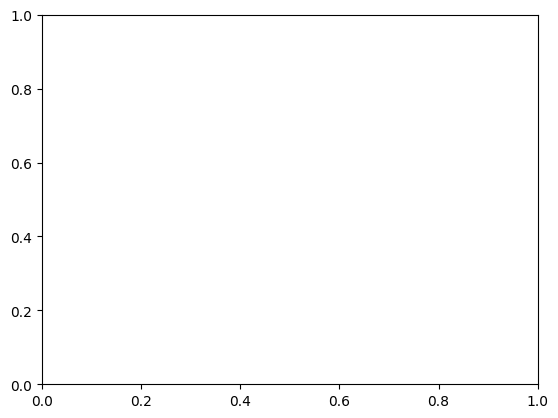

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [32]:
class_name = validation_set.class_names
class_name

['Acne', 'Benign', 'Eczema', 'Enfeksiyon', 'Malignant', 'Pigment']

In [33]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3923 files belonging to 6 classes.


In [34]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

123/123 ━━━━━━━━━━━━━━━━━━━━ 56s 435ms/step


(array([[5.32380998e-01, 9.55332443e-03, 2.06715941e-01, 2.21052662e-01,
         2.53213216e-02, 4.97572776e-03],
        [6.88172817e-01, 2.86036711e-02, 8.19596350e-02, 1.33443773e-01,
         5.82358241e-02, 9.58423316e-03],
        [3.11448038e-01, 2.85669044e-02, 1.04157396e-01, 5.25089741e-01,
         2.39238329e-02, 6.81407843e-03],
        ...,
        [9.21609223e-01, 4.45863436e-04, 3.54547948e-02, 1.77264921e-02,
         7.58085225e-04, 2.40056012e-02],
        [1.88486576e-01, 1.91037297e-01, 1.27205163e-01, 1.73847377e-01,
         1.66784748e-01, 1.52638867e-01],
        [2.08290979e-01, 1.99768059e-02, 1.88596155e-02, 2.24767812e-02,
         1.49267232e-02, 7.15469003e-01]], dtype=float32),
 (3923, 6))

In [35]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(3923,), dtype=int64, numpy=array([0, 0, 3, ..., 0, 1, 5], dtype=int64)>

In [37]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(3923, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [38]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(3923,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

              precision    recall  f1-score   support

        Acne       0.64      0.68      0.66       322
      Benign       0.83      0.71      0.77      1361
      Eczema       0.58      0.70      0.64       508
  Enfeksiyon       0.58      0.68      0.62       750
   Malignant       0.68      0.68      0.68       847
     Pigment       0.65      0.33      0.43       135

    accuracy                           0.68      3923
   macro avg       0.66      0.63      0.63      3923
weighted avg       0.70      0.68      0.68      3923



In [41]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[219,   8,  28,  46,  15,   6],
       [ 17, 973,  24, 129, 216,   2],
       [ 27,  13, 355,  92,  14,   7],
       [ 47,  25, 140, 510,  20,   8],
       [ 12, 146,  29,  80, 579,   1],
       [ 20,   5,  31,  27,   8,  44]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

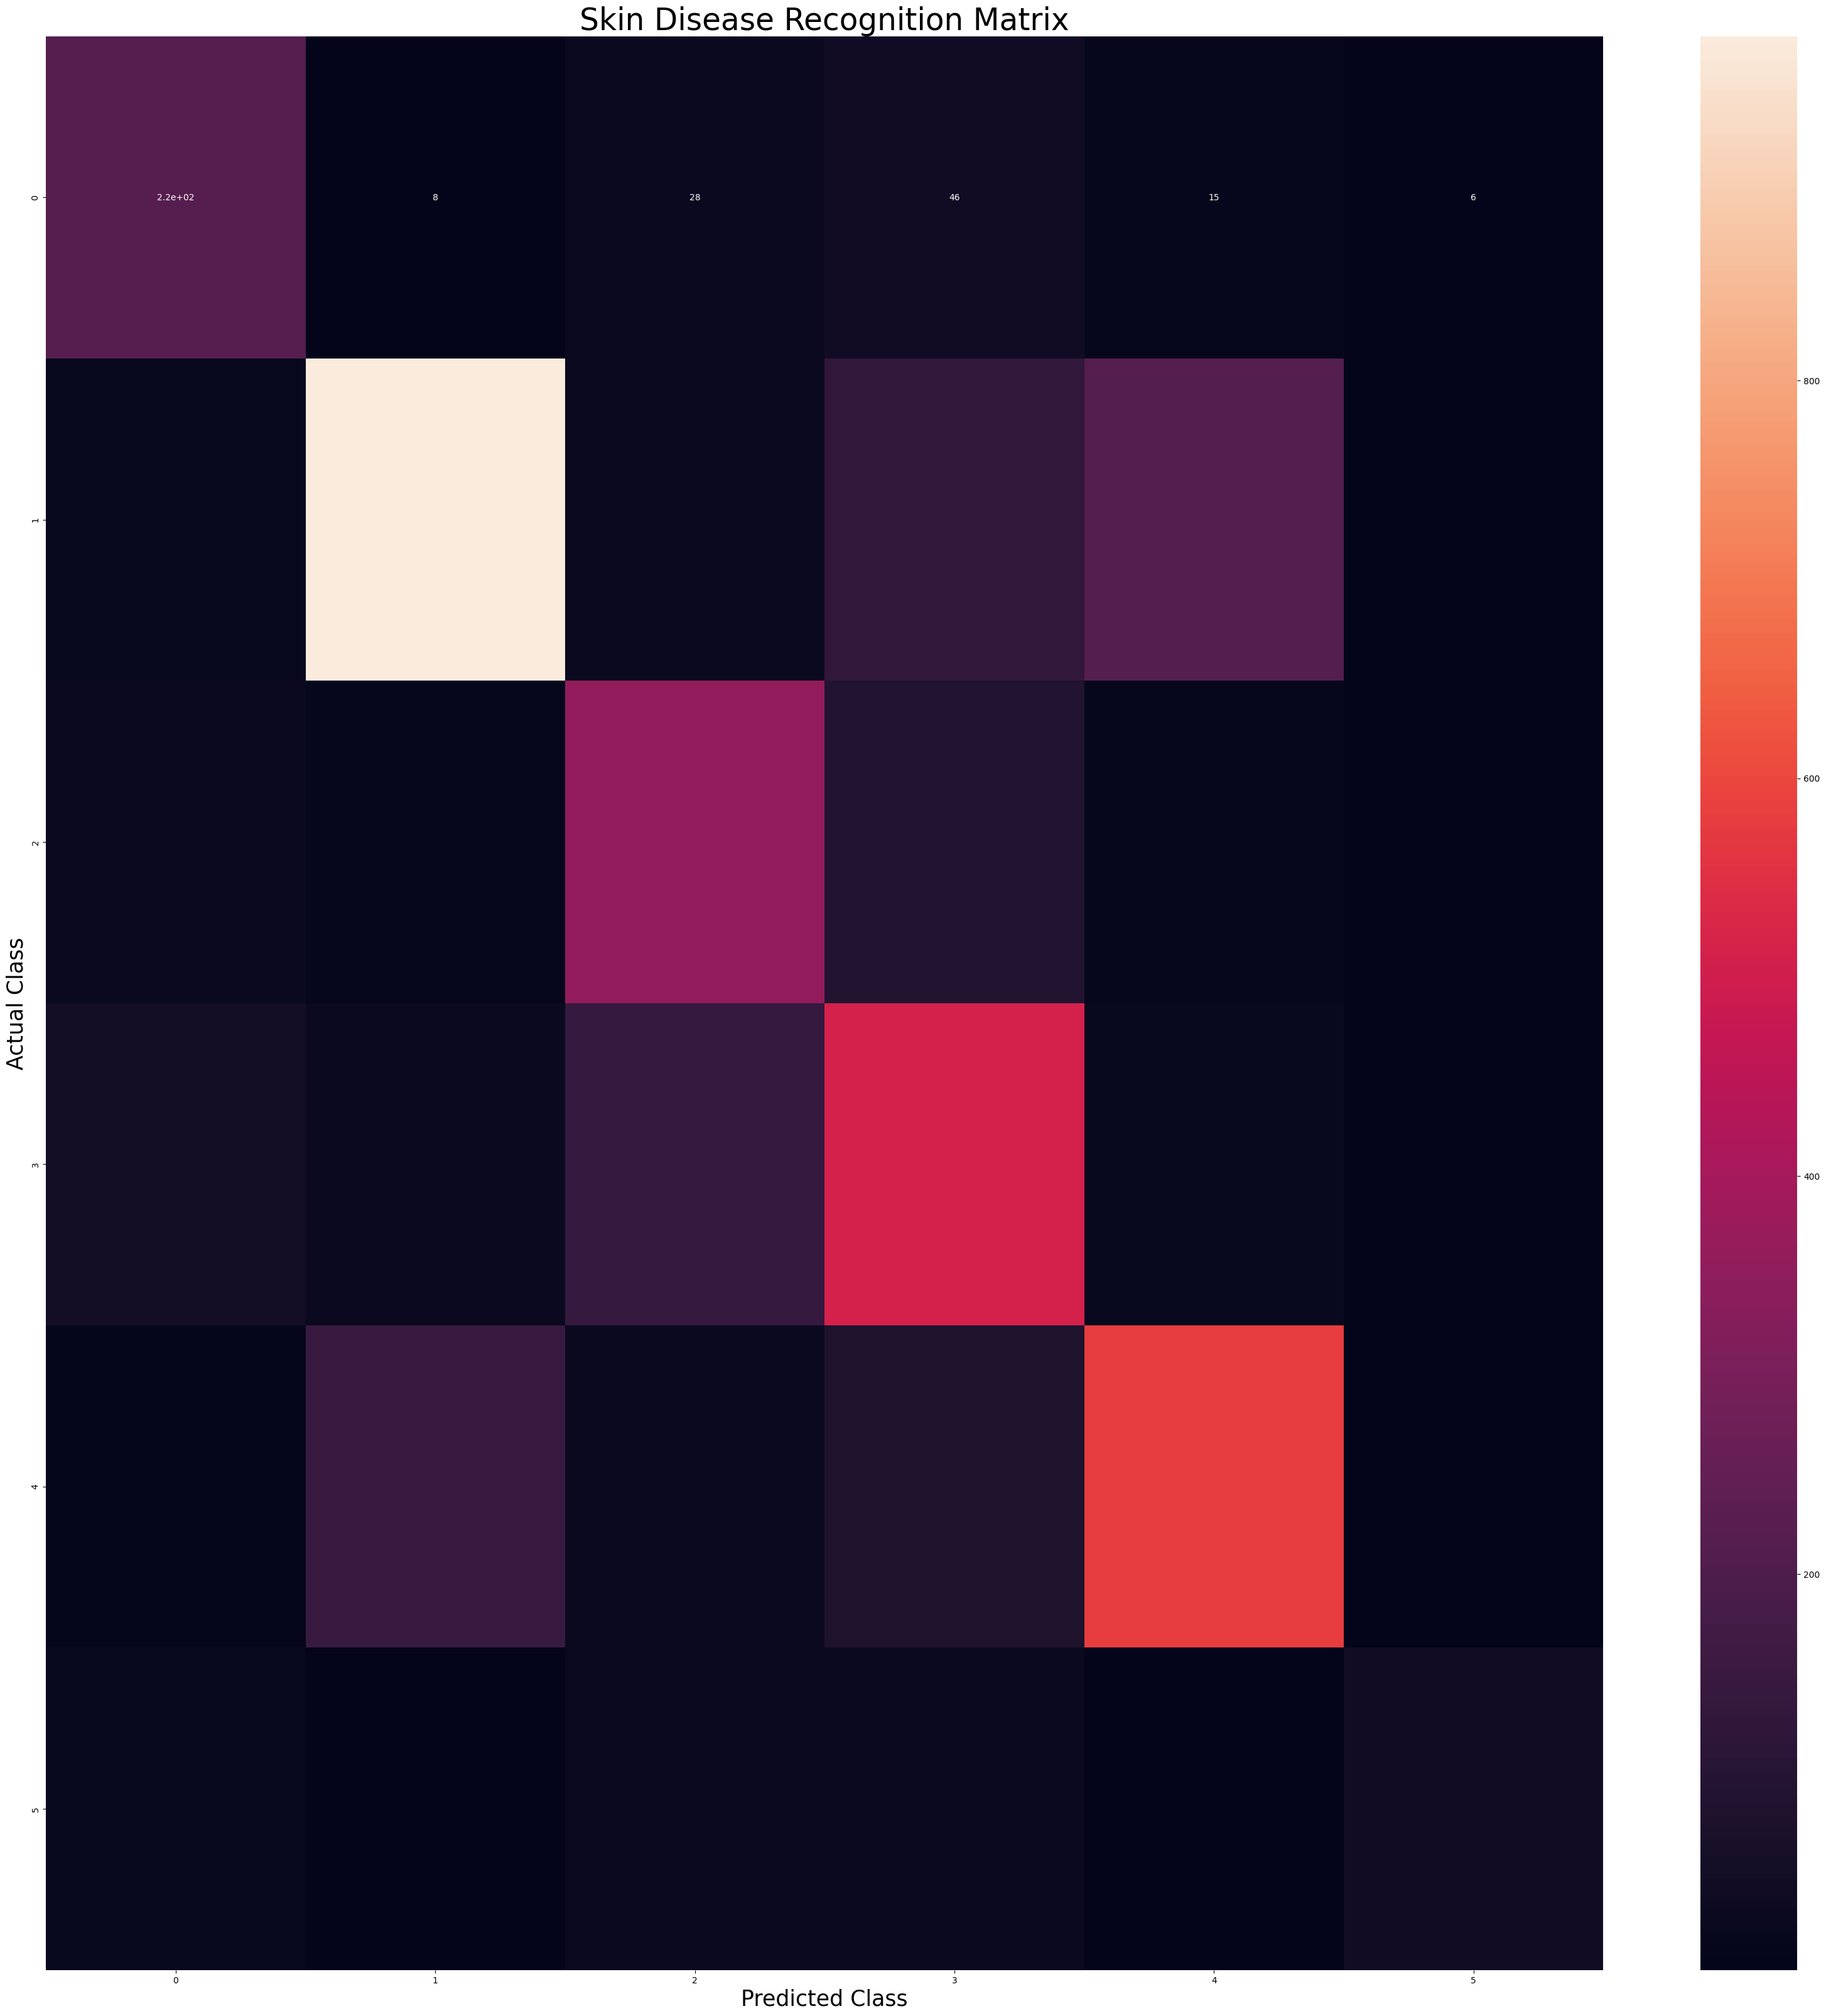

In [42]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=25)
plt.ylabel("Actual Class", fontsize=25)
plt.title("Skin Disease Recognition Matrix",fontsize=35)
plt.show